In [97]:
### Program : Decisontree + Randfomforest + Cross Validation + gridsearch 
import os 
import numpy as np 
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#import xgboost

In [98]:
%pwd

'D:\\Data Science - Course\\Random Forest'

In [99]:
os.chdir("D:\Data Science - Course\Random Forest")

In [100]:
chrn = pd.read_csv("Churn.csv")

In [101]:
chrn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [102]:
## drop the columns that are not required 
chrn = chrn.drop( [ "State", "Area Code", "Phone"], axis = 1)

In [103]:
target = chrn["Churn"]
chrn = chrn.drop(["Churn"], axis=1)

In [104]:
## train and test split
x_train, x_test, y_train, y_test = train_test_split( chrn, target, test_size=0.2, random_state=42)

In [105]:
## random Forest model 
rf = RandomForestClassifier()

In [122]:
rf = RandomForestClassifier(n_estimators=30,random_state = 123 )

In [123]:
rf.fit( x_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [124]:
y_pred = rf.predict( x_test)

In [125]:
confusion_matrix( y_test, y_pred)

array([[561,   5],
       [ 32,  69]], dtype=int64)

In [110]:
71/(71+6)

0.922077922077922

In [112]:
71/(71+30)

0.7029702970297029

In [113]:
2*0.92*0.7/(0.92+0.7)

0.7950617283950617

In [126]:
## variable importance of Randomforest model 
rf.feature_importances_

array([0.03354334, 0.0248082 , 0.12272104, 0.07830491, 0.03567545,
       0.04817332, 0.13158242, 0.07924778, 0.02391197, 0.03188569,
       0.14229635, 0.02531616, 0.06025511, 0.03118694, 0.03637706,
       0.05629021, 0.03842406])

In [127]:
## Sorting variables on the importance 
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_, index = x_train.columns,columns=['importance']).sort_values('importance',  ascending=False)                                                          

In [128]:
feature_importances

,importance
Day Charge,0.142296
CustServ Calls,0.131582
Day Mins,0.122721
Intl Plan,0.079248
Eve Mins,0.078305
Eve Charge,0.060255
Intl Calls,0.056290
Intl Mins,0.048173
Intl Charge,0.038424
Night Charge,0.036377


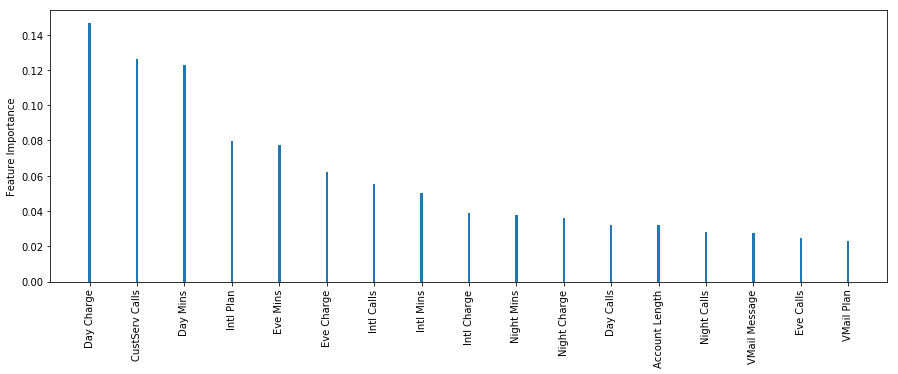

In [43]:
%matplotlib inline
fig, ax = plt.subplots(figsize = [15,5])
import matplotlib.pyplot as plt
plt.bar(feature_importances.index, feature_importances['importance'], width = 0.05  )
plt.xticks(feature_importances.index, rotation=90 )
plt.ylabel("Feature Importance")
plt.show()

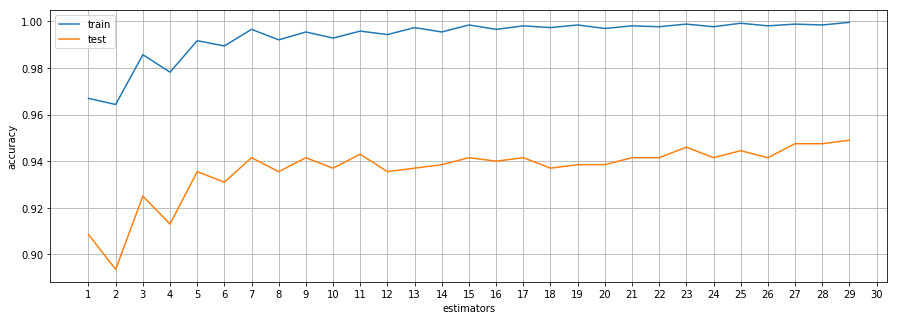

In [129]:
## parameter tuning 
n_estimators = []
acc_train = []
acc_test = []
for i in range(1,30):
 rf = RandomForestClassifier( n_estimators=i, random_state=123)
 rf.fit(x_train, y_train)
 pred = rf.predict(x_train)
 pred2 = rf.predict(x_test)
 acc_train.append(accuracy_score(y_train, pred))
 ####
 acc_test.append(accuracy_score(y_test, pred2))
 ####
 n_estimators.append(i)
d = pd.DataFrame({'acc_train':pd.Series(acc_train), 
 'acc_test':pd.Series(acc_test),
 'n_estimators':pd.Series(n_estimators)})
# visualizing changes in parameters
fig, ax = plt.subplots(figsize = [15,5])
plt.plot('n_estimators','acc_train', data=d, label='train')
plt.plot('n_estimators','acc_test', data=d, label='test')
plt.xlabel('estimators')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,31))
plt.grid()
plt.legend()

In [91]:
## grid parameters for grid search
param_grid = {
    'max_depth': [6,7,8],
    'n_estimators': [10, 15, 20],
    'max_features' : [4,5,6]
}

In [92]:
rf = RandomForestClassifier(random_state=9)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [93]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 128 out of 135 | elapsed:    6.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=9,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [94]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 20}

In [95]:
grid_search.cv_results_

{'mean_fit_time': array([0.05588555, 0.07075858, 0.09268088, 0.06039639, 0.07944555,
        0.10540223, 0.06532269, 0.08899317, 0.13633132, 0.05402532,
        0.07320185, 0.10051374, 0.06036429, 0.08732414, 0.11652856,
        0.06861506, 0.09856539, 0.13274937, 0.05951982, 0.0804575 ,
        0.10662522, 0.06316719, 0.09532785, 0.13072982, 0.07119117,
        0.10792499, 0.13492694]),
 'std_fit_time': array([4.09169636e-03, 3.29917079e-04, 4.04416815e-03, 4.02291773e-05,
        3.61732588e-03, 3.48851193e-03, 4.67822657e-03, 4.09725186e-03,
        7.53934149e-03, 3.71534524e-03, 3.73918533e-03, 8.63013871e-05,
        1.29608638e-03, 3.93296054e-03, 2.81530981e-03, 3.24991023e-03,
        3.10822876e-03, 7.51086821e-03, 5.76752787e-03, 9.76107909e-06,
        4.91773360e-03, 3.73049603e-03, 3.94864557e-03, 5.06163570e-03,
        1.00725789e-03, 7.21858694e-03, 1.25543716e-02]),
 'mean_score_time': array([0.00240283, 0.00403161, 0.00727096, 0.00562739, 0.00402646,
        0.004254

In [89]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    conf = confusion_matrix(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("Confusion Matrix")
    print(conf)
    return accuracy, conf


In [96]:

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Accuracy = 0.95%.
Confusion Matrix
[[561   5]
 [ 31  70]]


In [73]:
71/(71+6)

0.922077922077922

In [74]:
71/(71+30)

0.7029702970297029

In [57]:
2*0.92*.70/(0.92+0.70)

0.7950617283950617